# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [7]:
import pandas as pd

# Load data 
cast_df = pd.read_csv(r"C:\Users\andre\OIM7502_SP25\data\Archive\cast.csv")
titles_df = pd.read_csv(r"C:\Users\andre\OIM7502_SP25\data\Archive\titles.csv")
release_dates_df = pd.read_csv(r"C:\Users\andre\OIM7502_SP25\data\Archive\release_dates.csv")

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [10]:
print("CAST CSV")
print(cast_df.shape)
print(cast_df.dtypes)
print(cast_df.isnull().sum())
print(cast_df.describe(include='all'))

print("\nTITLES CSV")
print(titles_df.shape)
print(titles_df.dtypes)
print(titles_df.isnull().sum())
print(titles_df.describe(include='all'))

print("\nRELEASE DATES CSV")
print(release_dates_df.shape)
print(release_dates_df.dtypes)
print(release_dates_df.isnull().sum())
print(release_dates_df.describe(include='all'))


CAST CSV
(3442902, 6)
title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object
title              6
year               0
name               0
type               0
character          8
n            1327783
dtype: int64
                              title          year          name     type  \
count                       3442896  3.442902e+06       3442902  3442902   
unique                       168254           NaN       1265147        2   
top     Around the World in 80 Days           NaN  Bess Flowers    actor   
freq                           1364           NaN           820  2317612   
mean                            NaN  1.987597e+03           NaN      NaN   
std                             NaN  2.837612e+01           NaN      NaN   
min                             NaN  1.894000e+03           NaN      NaN   
25%                             NaN  1.967000e+03           NaN      NaN   
50%            

### 2. How many movies have the title North by Northwest

In [12]:
titles_df[titles_df['title'] == 'North by Northwest'].shape[0]

1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [14]:
hamlet_titles = titles_df[titles_df['title'] == 'Hamlet']
print("Count:", hamlet_titles.shape[0])
print("First year:", hamlet_titles['year'].min())
print("Last year:", hamlet_titles['year'].max())

Count: 20
First year: 1910
Last year: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [16]:
titles_df[titles_df['title'] == 'Treasure Island'].sort_values(by='year')

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [18]:
years = [1950, 1980, 2000]
for year in years:
    count = titles_df[titles_df['year'] == year].shape[0]
    print(f"Movies made in {year}: {count}")

Movies made in 1950: 1109
Movies made in 1980: 1750
Movies made in 2000: 2568


### 6. How big was the cast of Metropolis


In [20]:
metropolis_cast = cast_df[cast_df['title'] == 'Metropolis']
print("Cast size of Metropolis:", metropolis_cast.shape[0])

Cast size of Metropolis: 33


### 7. How many roles for actors were there 1950's? 1990's

In [22]:
cast_df['decade'] = (cast_df['year'] // 10) * 10

actors_1950s = cast_df[(cast_df['decade'] == 1950) & (cast_df['type'] == 'actor')].shape[0]
actors_1990s = cast_df[(cast_df['decade'] == 1990) & (cast_df['type'] == 'actor')].shape[0]

print("Actor roles in 1950s:", actors_1950s)
print("Actor roles in 1990s:", actors_1990s)

Actor roles in 1950s: 153559
Actor roles in 1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

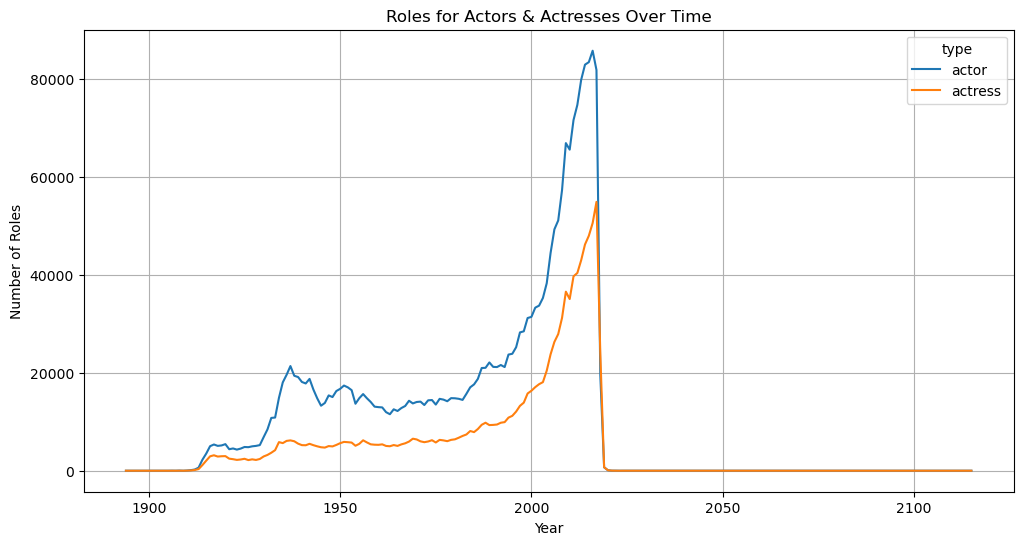

In [34]:
import matplotlib.pyplot as plt

roles_over_time = cast_df.groupby(['year', 'type']).size().unstack().fillna(0)

roles_over_time.plot(figsize=(12, 6), title="Roles for Actors & Actresses Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Roles")
plt.grid(True)
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [36]:
leading_2000s = cast_df[
    (cast_df['year'] >= 2000) & (cast_df['year'] < 2010) & (cast_df['n'] == 1)
].shape[0]

print("Leading roles in 2000s:", leading_2000s)

Leading roles in 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [38]:
no_rank_2000s = cast_df[
    (cast_df['year'] >= 2000) & (cast_df['year'] < 2010) & (cast_df['n'].isnull())
].shape[0]

no_rank_1950s = cast_df[
    (cast_df['year'] >= 1950) & (cast_df['year'] < 1960) & (cast_df['n'].isnull())
].shape[0]

print("Unranked roles in 2000s:", no_rank_2000s)
print("Unranked roles in 1950s:", no_rank_1950s)


Unranked roles in 2000s: 232037
Unranked roles in 1950s: 95406


### 11. Plot the number of films made in each decade

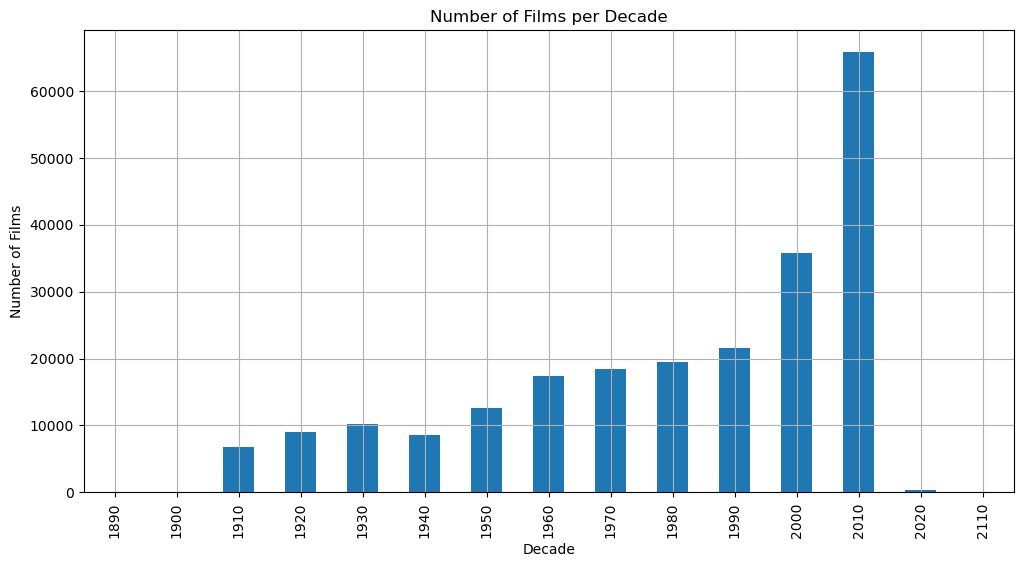

In [40]:
# Create a decade column
titles_df['decade'] = (titles_df['year'] // 10) * 10

# Count number of films per decade
films_per_decade = titles_df.groupby('decade').size()

# Plot
films_per_decade.plot(kind='bar', figsize=(12, 6), title='Number of Films per Decade')
plt.xlabel("Decade")
plt.ylabel("Number of Films")
plt.grid(True)
plt.show()


### 12. Plot the number of films with a Rustler character over time

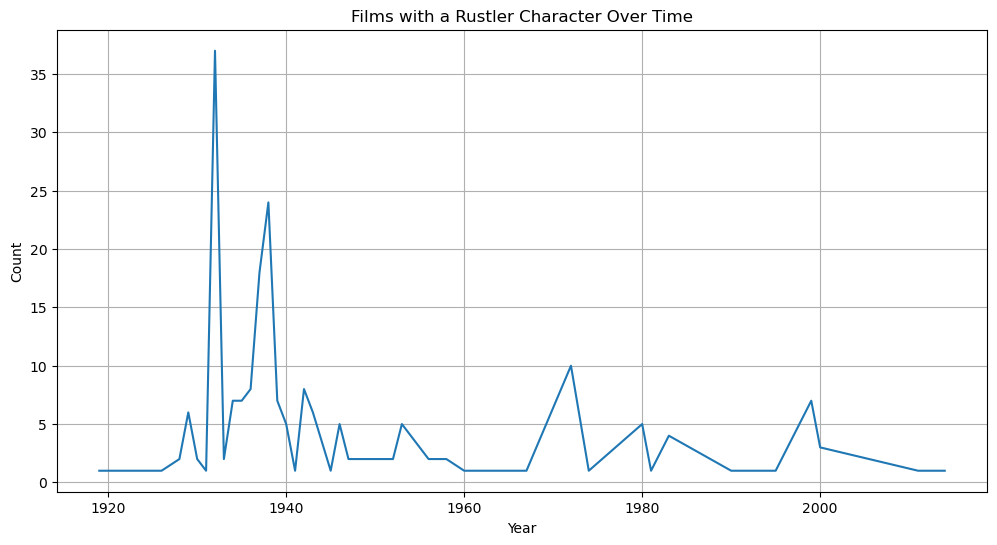

In [42]:
rustler_roles = cast_df[cast_df['character'].str.contains("Rustler", na=False)]
rustler_counts = rustler_roles.groupby('year').size()

# Plot
rustler_counts.plot(figsize=(12, 6), title='Films with a Rustler Character Over Time')
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


### 13. What are the top ten character names of all time?

In [44]:
top_characters = cast_df['character'].value_counts().head(10)
print("Top 10 character names of all time:")
print(top_characters)


Top 10 character names of all time:
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [46]:
actor_1990s = cast_df[(cast_df['year'] >= 1990) & (cast_df['year'] < 2000)]
top_actor_90s = actor_1990s['name'].value_counts().idxmax()
print("Actor in most films in the 1990s:", top_actor_90s)


Actor in most films in the 1990s: Shakti Kapoor


### 15. What are the top 10 roles that start with Science?

In [48]:
science_roles = cast_df[cast_df['character'].str.startswith('Science', na=False)]
top_science_roles = science_roles['character'].value_counts().head(10)
print("Top 10 roles starting with 'Science':")
print(top_science_roles)


Top 10 roles starting with 'Science':
character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [50]:
# Count cast size per title and year
largest_cast = cast_df.groupby(['title', 'year']).size().reset_index(name='cast_size')

# Find the film with the maximum cast
largest = largest_cast.sort_values('cast_size', ascending=False).head(1)
print("Film with the largest cast:")
print(largest)


Film with the largest cast:
                             title  year  cast_size
12037  Around the World in 80 Days  1956       1299


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [52]:
# Compute cast size per film
cast_size_stats = cast_df.groupby(['title', 'year']).size().describe()
print("Descriptive statistics for cast sizes:")
print(cast_size_stats)


Descriptive statistics for cast sizes:
count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64


### 18. How many films has Natalie Portman been in in each year throughout her career?

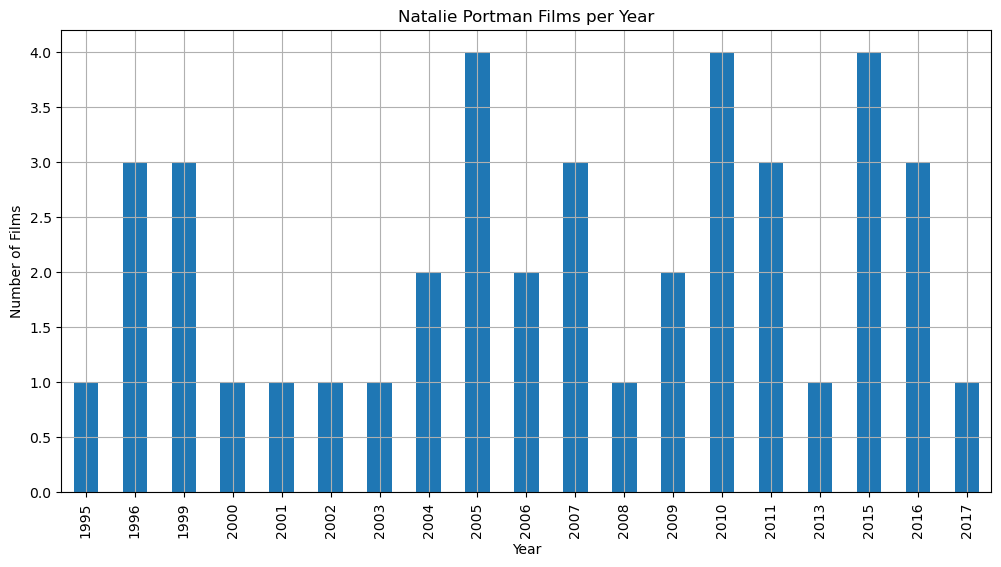

In [54]:
natalie_films = cast_df[cast_df['name'] == 'Natalie Portman']
natalie_per_year = natalie_films.groupby('year').size()

# Plot
natalie_per_year.plot(kind='bar', figsize=(12, 6), title='Natalie Portman Films per Year')
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.grid(True)
plt.show()


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

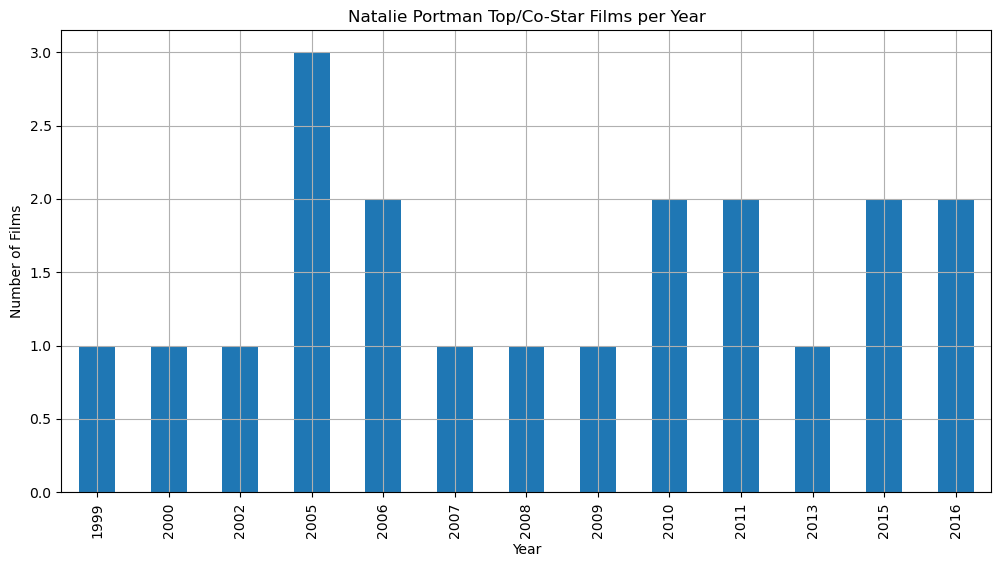

In [56]:
# Assuming top star is n==1, co-star is n==2
top_or_costar = natalie_films[natalie_films['n'].isin([1, 2])]
natalie_top_costar = top_or_costar.groupby('year').size()

# Plot
natalie_top_costar.plot(kind='bar', figsize=(12, 6), title='Natalie Portman Top/Co-Star Films per Year')
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.grid(True)
plt.show()


### 20. Determine how many roles for actor or actress by decade. Plot the output 

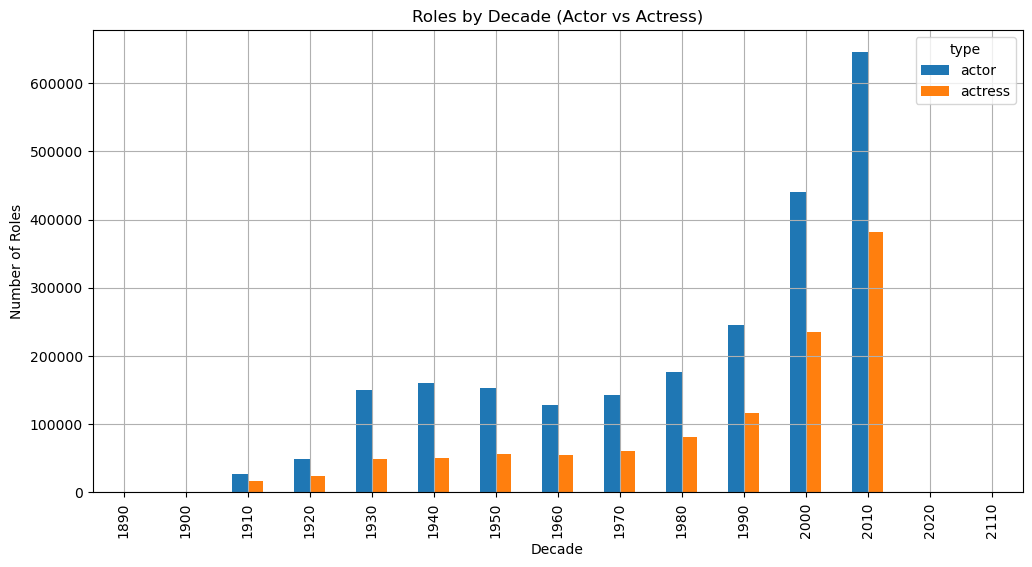

In [58]:
cast_df['decade'] = (cast_df['year'] // 10) * 10
roles_by_decade = cast_df.groupby(['decade', 'type']).size().unstack().fillna(0)

# Plot
roles_by_decade.plot(kind='bar', figsize=(12, 6), title='Roles by Decade (Actor vs Actress)')
plt.xlabel("Decade")
plt.ylabel("Number of Roles")
plt.grid(True)
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [60]:
release_dates_df['date'] = pd.to_datetime(release_dates_df['date'], errors='coerce')
release_dates_df['weekday'] = release_dates_df['date'].dt.day_name()
release_dates_df['month'] = release_dates_df['date'].dt.month_name()

# Pivot table
pivot = pd.pivot_table(release_dates_df, index='weekday', columns='month', values='date', aggfunc='count')
print("Pivot table of movie releases by weekday and month:")
print(pivot)


Pivot table of movie releases by weekday and month:
month      April  August  December  February  January   July   June  March  \
weekday                                                                      
Friday     13559   13430     13020     13833    13734  11635  11997  15268   
Monday      3168    2844      3240      3138     3699   2267   2337   3383   
Saturday    2868    2277      3357      2395     2925   2291   2409   2742   
Sunday      1358    1138      1813      1277     1822    894   1031   1228   
Thursday   10625    9931     10666     10356    10746   8947   9469  11844   
Tuesday     1446    1121      1903      1190     1823   1144   1179   1313   
Wednesday   4650    4270      5097      4118     4663   4243   4282   4479   

month        May  November  October  September  
weekday                                         
Friday     13198     14084    14893      14523  
Monday      3050      3372     3551       3161  
Saturday    2270      2547     2700       2551  


### 📊 Conclusion for Question 21

- **Friday dominates movie releases:** Across all months, Friday is the most frequent release day. This aligns with industry strategy to capitalize on weekend audiences.  
- **Thursday is the second most common release day,** often used for preview shows and early buzz generation before the weekend.  
- **Sunday and Tuesday have the fewest releases,** suggesting they are the least favorable days for theatrical debuts.  
- **October and September show the highest Friday releases,** likely due to seasonal content like Halloween or post-summer release slates.  
- **January and February are relatively slow months,** supporting the industry notion of "dump months" for lower-priority titles.  

These trends provide a clear view into how studios strategically time their releases to maximize audience engagement and box office performance.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

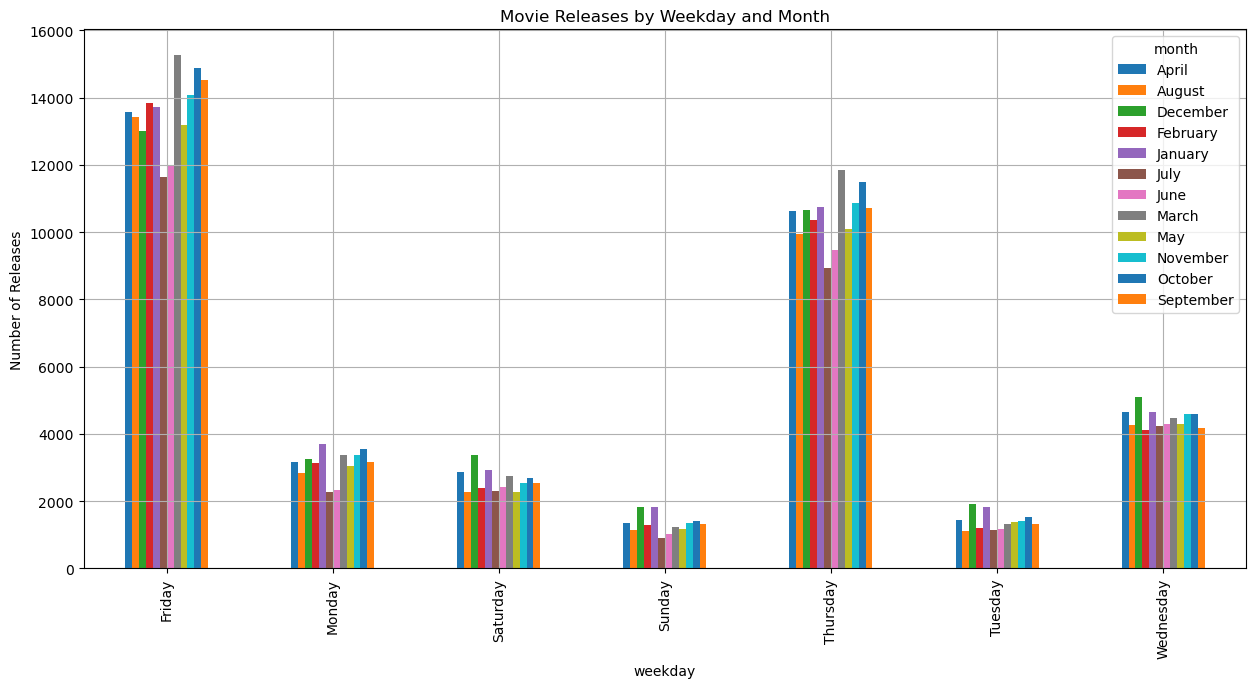

In [81]:
# Reuse the pivot from Q21
pivot.fillna(0).plot(kind='bar', figsize=(15, 7), title='Movie Releases by Weekday and Month')
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()


### 📊 Conclusion for Question 22

The bar chart successfully visualizes the number of movie releases by weekday across all months. Here's what we observe:

- **Friday is the dominant release day** in every month, confirming its strategic role in capturing weekend box office audiences.
- **Thursday is consistently the second-most popular day**, which aligns with the industry practice of early screenings and preview showings.
- **Sunday and Tuesday have the fewest releases**, suggesting these days are the least favored for theatrical debuts.
- **October, September, and March** show particularly high numbers on Fridays and Thursdays, potentially due to seasonal patterns like Halloween releases or pre-award-season debuts.
- Other weekdays (Monday, Wednesday, Saturday) follow moderate trends but are still far behind Friday and Thursday.

✅ The chart is accurate and correctly reflects the pivot table data. The grouped bars help identify both **weekday trends** and **seasonal (monthly) behaviors** in movie release strategies.


### 23. What films did actors in Star Wars go on to appear in? 

In [88]:
# Find all actors from Star Wars
star_wars_actors = cast_df[cast_df['title'].str.contains("Star Wars", na=False)]['name'].unique()

# Find all films those actors appeared in
films_by_sw_actors = cast_df[cast_df['name'].isin(star_wars_actors)]

# List some of the most frequent films
top_films = films_by_sw_actors['title'].value_counts().head(15)
print("Top 15 films (excluding Star Wars) with Star Wars actors:")
print(top_films[~top_films.index.str.contains("Star Wars")])


Top 15 films (excluding Star Wars) with Star Wars actors:
title
Under the Rainbow    30
Flash Gordon         24
Rogue One            20
Name: count, dtype: int64
